## Decision Tree 시각화 실습

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

## load iris data
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

## training model
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [6]:
from sklearn.tree import export_graphviz

## DecisionTreeClassifier Results visualization
## 시각화 결과를 tree.dot 파일로 저장
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

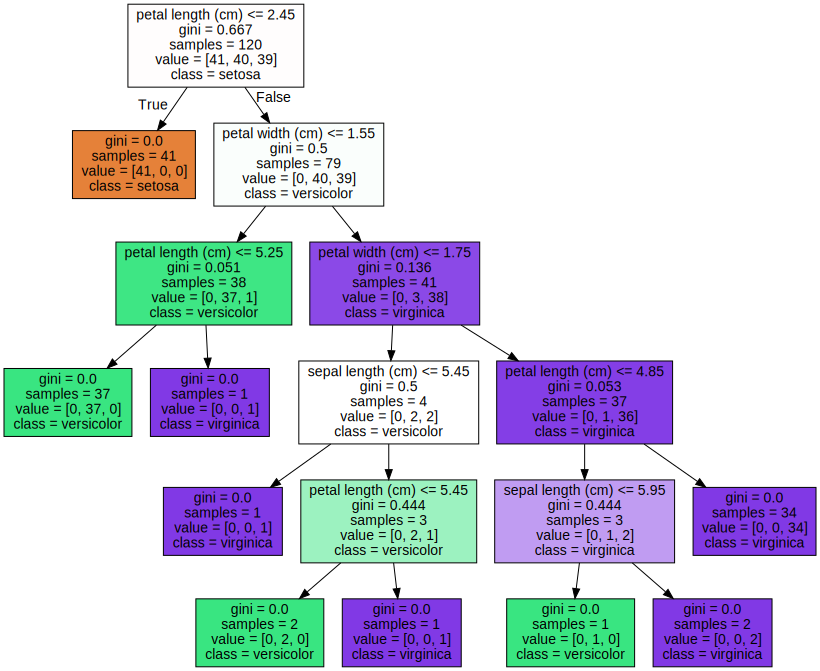

In [7]:
import graphviz

## 생성된 tree.dot 파일을 graphviz가 읽어서 시각화
with open("/content/tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [8]:
## 과적합 방지를 위해 max_depth 하이퍼 파라미터 변경
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

## DecisionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=156)

## load iris data
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

## training model
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=156)

In [9]:
from sklearn.tree import export_graphviz

## DecisionTreeClassifier Results visualization
## 시각화 결과를 tree.dot 파일로 저장
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, feature_names=iris_data.feature_names, impurity=True, filled=True)

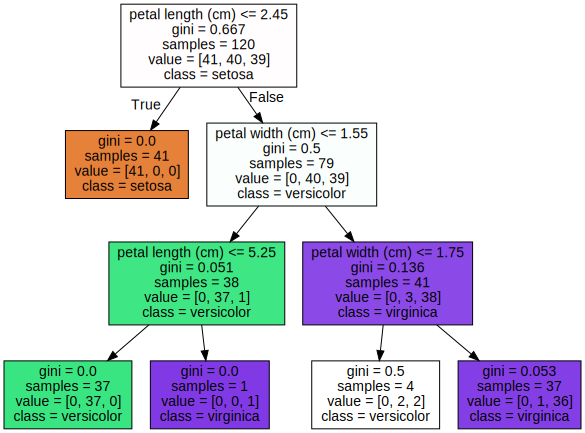

In [10]:
import graphviz

## 생성된 tree.dot 파일을 graphviz가 읽어서 시각화
with open("/content/tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

## 결정트리의 feature_importances_

feature importances:
[0.    0.    0.558 0.442]
sepal length (cm) : 0.0
sepal width (cm) : 0.0
petal length (cm) : 0.5581074301265275
petal width (cm) : 0.4418925698734724


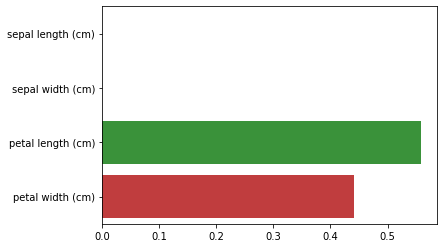

In [15]:
import seaborn as sns
import numpy as np

## feature importance 추출
print('feature importances:')
print(np.round(dt_clf.feature_importances_, 3))

## feature importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print(f"{name} : {value}")

## seaborn을 이용한 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

## 결정트리 실습 - 사용자 행동 인식 데이터셋

- datasets url - https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

## features 확인
feature_name_df = pd.read_csv("/content/drive/MyDrive/파이썬 머신러닝 완벽 가이드/data/human_activity/features.txt", sep='\s+', header=None, names=['column_index', 'column_name'])
feature_name_df

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [19]:
## feature index 제거 및 샘플 10개 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('10개의 feature sample: ')
print(feature_name[:10])

10개의 feature sample: 
['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']
